Load the `ISLR2` and `tidyverse` packages.

In [1]:
library(ISLR2) 
library(tidyverse)



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
glimpse(Auto)




Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

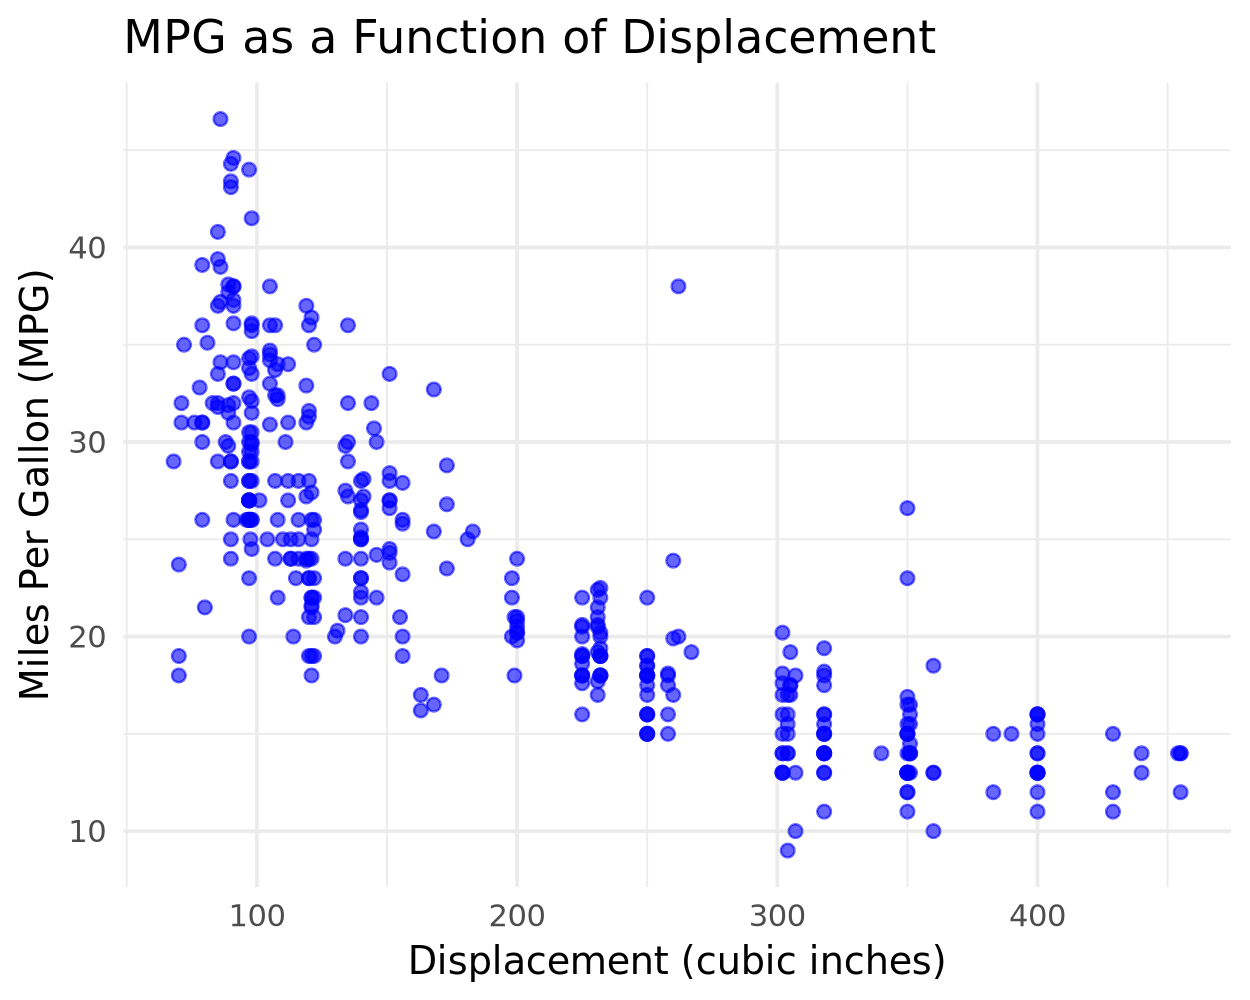

In [3]:
Auto %>%
  ggplot(aes(x = displacement, y = mpg)) +
  geom_point(color = "blue", alpha = 0.6) +
  labs(
    title = "MPG as a Function of Displacement",
    x = "Displacement (cubic inches)",
    y = "Miles Per Gallon (MPG)"
  ) +
  theme_minimal()



❓Does the relationship of `mpg` to `displacement` look linear?

In [ ]:
Yes it does appear Linear



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [10]:

library(splines)

# Load the Auto dataset
data("Auto")

# Split the data into training and testing sets
set.seed(123) # For reproducibility
auto_train <- Auto |> sample_frac(0.8)
auto_test <- setdiff(Auto, auto_train)

# Transform `displacement` using natural splines
auto_train <- auto_train |> 
  mutate(
    displacement_spline1 = ns(displacement, df = 3)[, 1],
    displacement_spline2 = ns(displacement, df = 3)[, 2],
    displacement_spline3 = ns(displacement, df = 3)[, 3]
  )

# Convert `cylinders` to a categorical variable and create dummy variables
auto_train <- auto_train |> 
  mutate(cyl_cat = factor(cylinders)) |> 
  select(-cylinders) |> 
  pivot_wider(names_from = cyl_cat, values_from = cyl_cat, values_fn = length, values_fill = 0)

# Add back `cylinders` or `cyl_cat` for plotting
auto_train <- auto_train |> 
  mutate(cylinders = as.numeric(as.character(cyl_cat)))

# Fit a linear model
mod_fit <- lm(
  mpg ~ displacement_spline1 + displacement_spline2 + displacement_spline3 + `4` + `6` + `8`,
  data = auto_train
)

# Predict and prepare data for visualization
predicted_data <- auto_train |> 
  mutate(.pred = predict(mod_fit, auto_train))

# Visualize the results
ggplot(predicted_data, aes(x = displacement, y = mpg)) +
  geom_point(size = 1, alpha = 0.35) +
  geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1) +
  labs(
    title = "Modeling MPG as a Function of Displacement and Cylinders",
    x = "Displacement",
    y = "Miles Per Gallon (MPG)",
    color = "Cylinders"
  ) +
  theme_minimal()

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `cylinders = as.numeric(as.character(cyl_cat))`.
[1mCaused by error:[22m
[33m![39m object 'cyl_cat' not found
